In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('heart_mod.csv')
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
294,32,1,3,95,0,1,0,127,0,0.7,1,1
25,36,1,1,130,209,0,0,178,0,0.0,1,0
561,54,1,2,132,182,0,2,141,0,0.1,1,0
634,40,1,3,140,199,0,0,178,1,1.4,1,0
20,43,0,3,100,223,0,0,142,0,0.0,1,0


In [2]:
#Need to split data into training set and testing set
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, random_state=42
)

In [3]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,1,120,240,1,0,194,0,0.8,2
25,36,1,1,130,209,0,0,178,0,0.0,1
84,56,1,0,150,213,1,0,125,1,1.0,0
10,37,0,1,130,211,0,0,142,0,0.0,1
344,51,1,0,120,0,1,0,104,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,0,120,254,0,2,110,0,0.0,1
270,45,1,0,120,225,0,0,140,0,0.0,1
860,60,1,0,130,253,0,0,144,1,1.4,1
435,60,1,0,152,0,0,2,118,1,0.0,1


In [4]:
Y_train

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import functools
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, Y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.7670 - precision: 0.7875 - recall: 0.7855
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8624 - precision: 0.8571 - recall: 0.8978
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8801 - precision: 0.8753 - recall: 0.9102
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8842 - precision: 0.8624 - recall: 0.9377
Epoch 5/100
23/23 [==============================] - 0s 957us/step - loss: 0.3126 - accuracy: 0.8815 - precision: 0.8925 - recall: 0.8903
Epoch 6/100
23/23 [==============================] - 0s 957us/step - loss: 0.2694 - accuracy: 0.8883 - precision: 0.8900 - recall: 0.9077
Epoch 7/100
23/23 [==============================] - 0s 957us/step - loss: 0.2587 - accuracy: 0.8910 - precision: 0.8812 - recall: 0.9252
Epoch 8/100
23/23 [=======================

23/23 [==============================] - 0s 914us/step - loss: 0.2181 - accuracy: 0.9441 - precision: 0.9615 - recall: 0.9352
Epoch 60/100
23/23 [==============================] - 0s 957us/step - loss: 0.2978 - accuracy: 0.9469 - precision: 0.9594 - recall: 0.9426
Epoch 61/100
23/23 [==============================] - 0s 957us/step - loss: 0.2064 - accuracy: 0.9114 - precision: 0.9330 - recall: 0.9027
Epoch 62/100
23/23 [==============================] - 0s 957us/step - loss: 0.1501 - accuracy: 0.9387 - precision: 0.9564 - recall: 0.9302
Epoch 63/100
23/23 [==============================] - 0s 957us/step - loss: 0.1200 - accuracy: 0.9578 - precision: 0.9768 - recall: 0.9451
Epoch 64/100
23/23 [==============================] - 0s 914us/step - loss: 0.1074 - accuracy: 0.9591 - precision: 0.9843 - recall: 0.9401
Epoch 65/100
23/23 [==============================] - 0s 957us/step - loss: 0.0954 - accuracy: 0.9659 - precision: 0.9772 - recall: 0.9601
Epoch 66/100
23/23 [====================

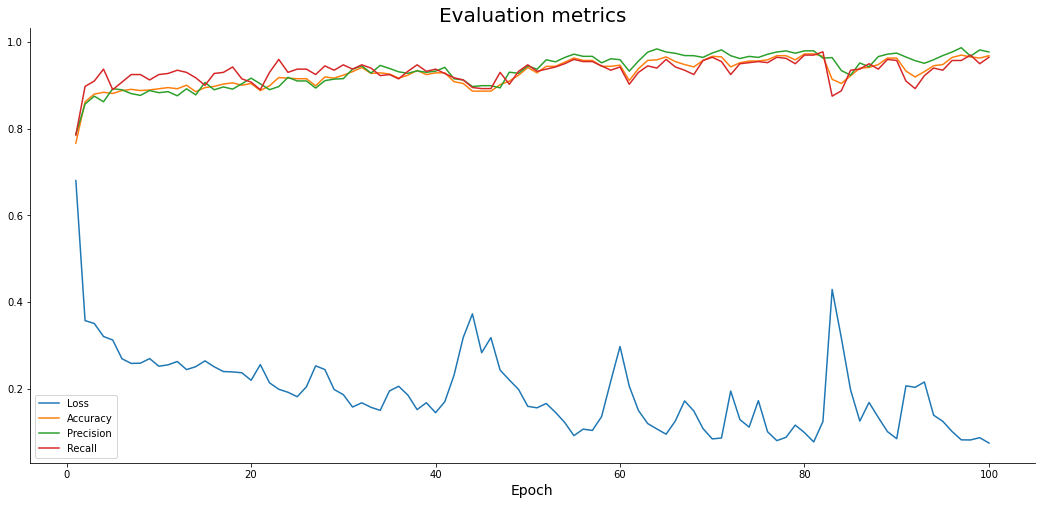

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();